## Rheokinetics (26 points)

#### Authors

In [143]:
#import packages here
import numpy as np
import matplotlib.pyplot as plt
from math import exp
import matplotlib as mpl
import pandas as pd

#### In the last notebook, you got familiar with the kinetics related to the curing of thermoset polymers. This time, the focus will be on flow-related topics of such polymers. This is applicable to several manufacturing techniques you heard of in the lectures, like liquid composite moulding. This area of study is called rheology, and it plays a fundamental role in the manufacturing of polymers, serving as a crucial scientific discipline that governs the viscosity, flow and deformation behavior of polymer materials. Deep knowledge of rheology is indispensable to work in polymer composite manufacturing. This field enables control of material behavior and improved quality of produced parts.

#### As you now know, the curing of a thermoset consists of chemical reactions between individual monomers, or polymer chains and monomers, or polymer chains and other polymer chains. This phenomenon, known as cross-linking, results in a progressive increase in the molecular weight of thermosets, leading to a corresponding rise in viscosity.
#### The viscosity of a fluid is a measure of its resistance to deformation at a given rate. Viscosity can be conceptualized as quantifying the internal frictional force that arises between adjacent layers of fluid that are in relative motion.

#### Several models exists to predict the flow behaviour of thermoset materials. The Castro-Macosko model is a widely used and well-established model to simulate the changes in viscosity of thermoset materials. The model describes the viscosity as a function of temperature $T$ and degree of cure $\alpha$. Shear rate $\gamma$ will not be considered in this version of the model. The model is displayed in equation 1.

$$\eta(T, \alpha) = \eta_0(T) (\frac{\alpha_g}{\alpha_g - \alpha})^{c1+c2\alpha}$$

#### For which $\eta_0(T) = A \exp \frac{T_b}{T}$ and $T_b, c1, c2, \alpha_g$ and $A$ are material properties. 
#### The parameter $\alpha_g$ identifies the degree of cure at which gelation occurs, at which point the viscosity of material increases significantly.

#### The following model is given to you for the considered dicyanate: 1,1-bis(4-cyanatophenol)ethane, known as AroCy L-10, supplied by Rhone-Poulenc Inc.
#### $$\eta(T, \alpha) = 3.32 \cdot 10^{-8} \exp \frac{5160.39}{T} (\frac{0.64}{0.64 - \alpha})^{2.32+1.4\alpha}$$
##### The parameters are reported below:
#### $T_b = 5160.39 K$, $c_1 = 2.32$, $c_2 = 1.4$, $\alpha_g = 0.64$, $A = 3.32 \cdot 10^{-8} Pa \cdot s$

#### Source: Chen, Y.-T. and Macosko, C.W. (1996), Kinetics and rheology characterization during curing of dicyanates. J. Appl. Polym. Sci., 62: 567-576. https://doi-org.tudelft.idm.oclc.org/10.1002/(SICI)1097-4628(19961017)62:3<567::AID-APP14>3.0.CO;2-W

### Question 1 (2 points)

#### Question 1.1: Plot for this resin system the viscosity versus the degree of cure for several isothermal cure temperatures. Report the chosen temperatures and choose a suitable scale for the axes.

Eta at T= 0.0 C = 9.588171 Pa s
Eta at T= 22.2 C = 2.314483 Pa s
Eta at T= 44.4 C = 0.68164 Pa s
Eta at T= 66.7 C = 0.235555 Pa s
Eta at T= 88.9 C = 0.092743 Pa s
Eta at T= 111.1 C = 0.040671 Pa s
Eta at T= 133.3 C = 0.019518 Pa s
Eta at T= 155.6 C = 0.010108 Pa s
Eta at T= 177.8 C = 0.005585 Pa s
Eta at T= 200.0 C = 0.003263 Pa s


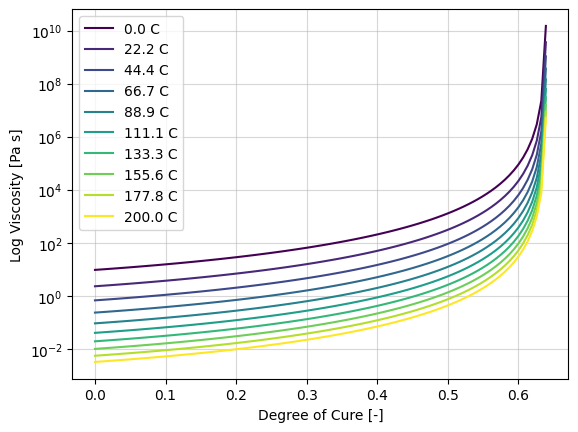

In [144]:
def eta(T, alpha):
    eta_=3.32e-8*exp(5160.39/T)*(0.64/(0.64-alpha)**(2.32+1.4*alpha))
    return eta_

cmap = mpl.colormaps['viridis']
n_lines = 10
n_points = 100
colors = cmap(np.linspace(0, 1, n_lines))
T_list = np.linspace(0, 200, n_lines)+273.15
alpha_list = np.linspace(0, 0.639, n_points)
plt.grid(alpha=0.5)
for i in range(n_lines):
    eta_list = [eta(T_list[i], alpha_list[j]) for j in range(n_points)]
    plt.semilogy(alpha_list, eta_list, color=colors[i], label=f'{round(T_list[i]-273.15,1)} C')
    print(f"Eta at T= {round(T_list[i]-273.15, 1)} C = {round(eta_list[0],6)} Pa s")
plt.ylabel("Log Viscosity [Pa s]")
plt.xlabel("Degree of Cure [-]")
plt.legend()
plt.show()

#### Question 1.2: Which information regarding the processability of this resin can be retrieved from the graph? You can include considerations that would be relevant for LCM processes such as choice of different cure temperatures and how viscosity plays a role in the process and discuss important observations made from the graph.

Answer:
Essentially the important information is how fast the resin will flow through the object you are infusing and the viscosity will let you know what strategy you should take to infuse it. This graph will also show you what the viscosity reduction will be according to temperature and you can see that the decrease in viscosity per unit temperature is much higher the lower you are. When you go from 20 to 40 degrees the viscosity is about a quarter but when you go from 177 to 200 the viscosity only halves.

### Question 2 (3 points)

#### The goal of this question is to analyze the correlation between viscosity, temperature and heating rate for non-isothermal curing. In the image below, a typical viscosity vs. temperature plot is displayed for values obtained experimentally and through the Castro-Macosko model. A U-shape viscosity curve pattern can be observed when the temperature is increased. The viscosity drops at first, but ater reaching a minimum, viscosity soon increases significantly.

#### Explain the behaviour of viscosity while curing, specifically:
#### 1. What is the reason behind the initial lowering of resin viscosity?
#### 2. Why does this trend change significantly, after reaching a certain temperature?
#### 3. How does the heating rate effect the shape of the curve and why?
#### Write your answer in the textbox below the image an provide detailed explanations. Also link your answer to the Macosko model.

![title](eta_temp.png)

Answer:
1. The initial reduction of viscosity relates directly to the Arrhenius equation which states that the resin's viscosity will be proportional to the inverse exponential of the temperature of the resin.
2. As it heats the speed of the reaction of the thermoset increases, this reaction will accelerate as the network crosslinks and increase the viscosity. This phenomenon takes over and ends up gelating the resin
3. Since the thermoset reaction is also time dependant, the 2C/min graph is increasing in temperature faster and therefore decreasing in viscosity faster. The thermoseting reaction then lags behind as it does not have the same time to crosslink.

### Question 3 (1 points)

#### Dynamic Mechanical Analysis, otherwise known as DMA,  is an experimental technique employed to investigate the response of materials to cyclic deformations under controlled conditions (stress, temperature, frequency, and various other parameters).

#### DMA works by applying a sinusoidal deformation to a sample of known geometry. The sample can be subjected to a controlled stress or a controlled strain. For a known stress, the sample will then deform a certain amount (or vice versa). The extent of deformation exhibited by the specimen is indicative of its stiffness.

#### DMA characterizes the material in terms of stiffness and damping, which are quantified as modulus and tangent delta (tan δ). Given the sinusoidal excitation, modulus can be further divided into in-phase (storage modulus, G') and out-of-phase (loss modulus, G'') components. The storage modulus, G', delineates the material's elastic behavior. $tan(\delta)$, calculated as the ratio of the loss modulus to the storage modulus, represents damping and serves as a measure of a material's capacity to dissipate energy.

#### From tests like these, information about the storage modulus G' and loss modulus G'' can be derived. This is achieved via a known complex relationship between shear-stress and shear-strain.
$$ G* = \frac{\tau_{max}}{\gamma_{max}} = G' + iG'' $$

#### This can then be used to relate to the phase shift $\delta$ in the following manner.
$$ tan(\delta) = \frac{G''}{G'} $$

#### A spreadsheet containing DMA measurement data has been provided to you with this notebook. In this dataset, storage and loss moduli are noted for different frequencies at different temperatures. The sample is Airstone 780E, at 95% cure (only use sample #1).
#### From this data, plot two graphs showing $G'$ and $G''$ vs. temperature (for each frequency) and $tan(\delta)$ vs. temperature (for each frequency). Make sure to choose a suitable scale for the axes.

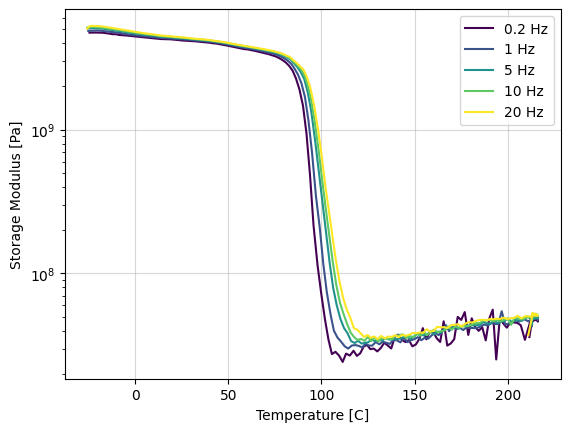

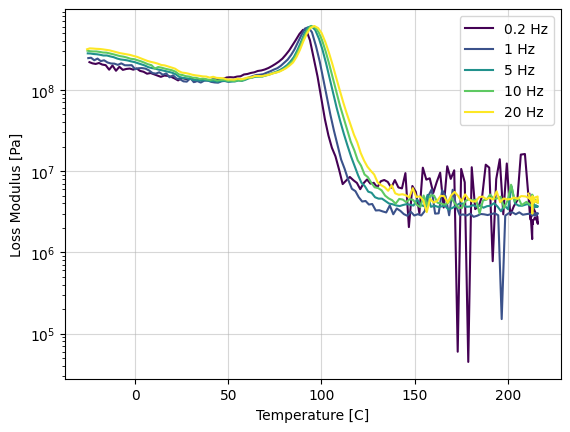

In [145]:
# Code for 1st plot here
DMA = pd.read_excel("DMA results - new.xlsx", header=29)
DMA = DMA.drop(index=0)
DMA = DMA.drop(index=[DMA.index[i] for i in range(-1,-43,-1)])
DMA.head()
# # DMA[r"E\'(G\')]"]
freq_list = [0.200000002980232, 1, 5, 10, 20]
cmap = mpl.colormaps['viridis']
colors = cmap(np.linspace(0, 1, len(freq_list)))
plt.grid(alpha=0.5)
for i, freq in enumerate(freq_list):
    DMA_freq = DMA.loc[DMA['Freq.'] == freq]
    plt.semilogy(DMA_freq["Temp."], DMA_freq["E\'(G\')"], color=colors[i], label=f'{round(freq,1)} Hz')

plt.legend()
plt.ylabel("Storage Modulus [Pa]")
plt.xlabel("Temperature [C]")
plt.show()
plt.grid(alpha=0.5)
for i, freq in enumerate(freq_list):
    DMA_freq = DMA.loc[DMA['Freq.'] == freq]
    plt.semilogy(DMA_freq["Temp."], DMA_freq["E\"(G\")"], color=colors[i], label=f'{round(freq,1)} Hz')

plt.legend()
plt.ylabel("Loss Modulus [Pa]")
plt.xlabel("Temperature [C]")
plt.show()

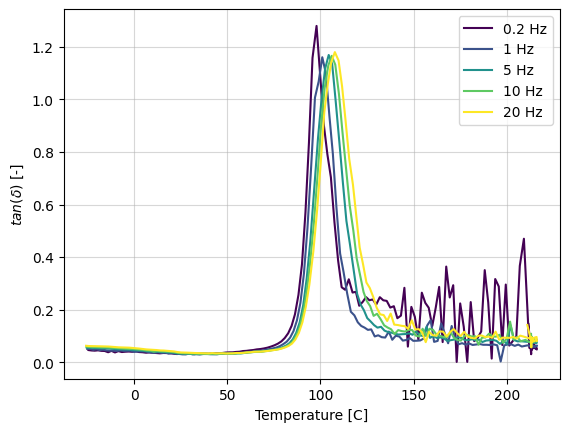

In [146]:
# Code for 2nd plot here
DMA = pd.read_excel("DMA results - new.xlsx", header=29)
DMA = DMA.drop(index=0)
DMA = DMA.drop(index=[DMA.index[i] for i in range(-1,-43,-1)])
DMA.head()
# # DMA[r"E\'(G\')]"]
freq_list = [0.200000002980232, 1, 5, 10, 20]
cmap = mpl.colormaps['viridis']
colors = cmap(np.linspace(0, 1, len(freq_list)))
plt.grid(alpha=0.5)
for i, freq in enumerate(freq_list):
    DMA_freq = DMA.loc[DMA['Freq.'] == freq]
    plt.plot(DMA_freq["Temp."], DMA_freq["E\"(G\")"]/DMA_freq["E\'(G\')"], color=colors[i], label=f'{round(freq,1)} Hz')

plt.legend()
plt.ylabel(r"$tan(\delta)$ [-]")
plt.xlabel("Temperature [C]")
plt.show()

### Question 4 (2 points)

#### Consider the plots you generated in the previous question, showing the variations of G' and G'' as functions of temperature for Airstone 780E. Now, please address the following points regarding the relationship between moduli and temperature:
#### - Explain why there is a decrease in the storage modulus G'.
#### - Elaborate on why the loss modulus G'' shows a peak
#### Please provide detailed answers below

Answer:
1. As the temperature increases the polymer's glass transistion temperature is reached and as it becomes more mobile the storage modulus is lowered it begins behaves more as a liquid and loses its ability to retain its shape.
2. The polymer chains become more mobile and this allows for internal friction in the polymer network. This is then able to dissipate the energy which shows as a spike in loss modulus, this then decreases as the chains keep increasing in mobility.


### Question 5 (4 points)

#### Question 5.1: From the above-used dataset, plot storage modulus vs. temperature for every frequency. Then, find $T_g$ for each curve by using the following method: Tg can be determined from the intersection of two lines that are drawn in two regions; one in the brittle glassy state and the other in the transition region. The temperature at which these 2 lines intersect can be considered $T_g$. Report the found values of $T_g$ in the title(s). Also, demonstrate this method in the said plot: plot the intersecting lines on top of the data. If you feel it's necessary, zoom in on the points of intersect.
#### NOTE: make  an individual plot for each frequency dataset, therefore five graphs should be plotted separately

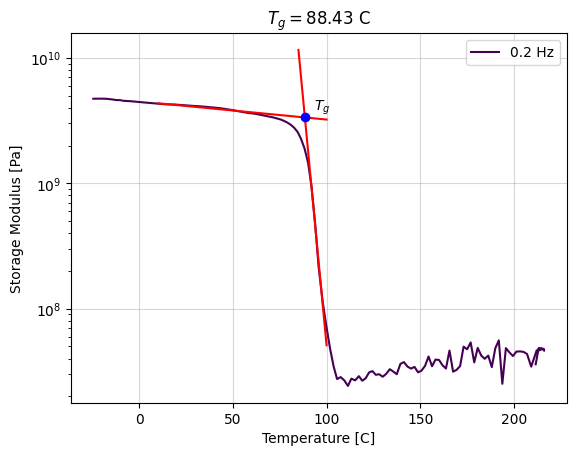

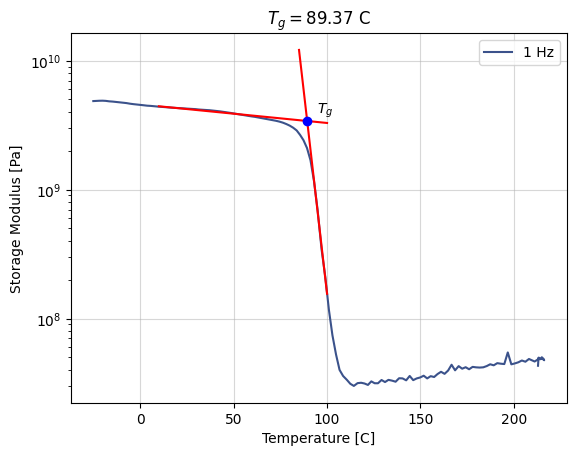

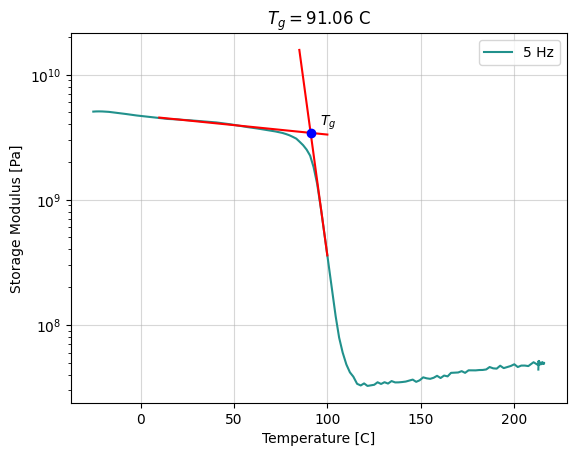

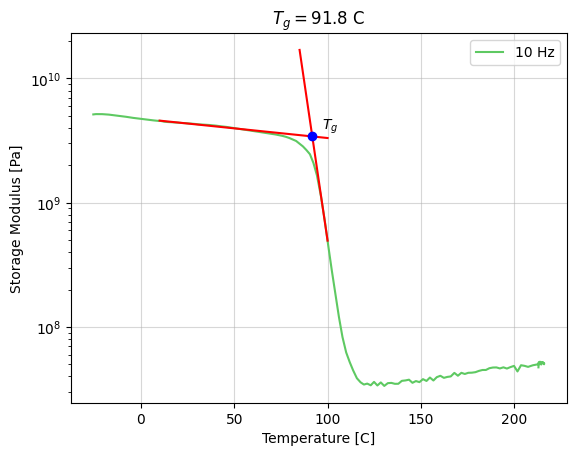

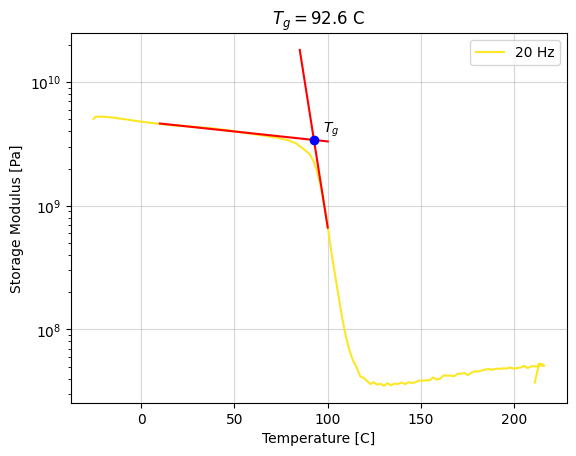

In [147]:
DMA = pd.read_excel("DMA results - new.xlsx", header=29) # Read data
DMA = DMA.drop(index=0) # Remove units header
DMA = DMA.drop(index=[DMA.index[i] for i in range(-1,-43,-1)]) # Remove weird data
DMA.head()
freq_list = [0.200000002980232, 1, 5, 10, 20] # Frequencies tested
for i, freq in enumerate(freq_list):
    plt.grid(alpha=0.5)

    DMA_freq = DMA.loc[DMA['Freq.'] == freq] # Selecting frequency
    plt.semilogy(DMA_freq["Temp."], DMA_freq["E\'(G\')"], color=colors[i], label=f'{round(freq,1)} Hz')

    # Line 1
    line_1_x = DMA_freq["Temp."].iloc[10:50].to_numpy(dtype=float)
    line_1_y = np.log10(DMA_freq["E\'(G\')"].iloc[10:50].to_numpy(dtype=float))
    # Line 2
    line_2_x = DMA_freq["Temp."].loc[((1e8<DMA_freq["E\'(G\')"]) & (DMA_freq["E\'(G\')"]<1e9))].to_numpy(dtype=float)
    line_2_y = np.log10(DMA_freq["E\'(G\')"].loc[((1e8<DMA_freq["E\'(G\')"]) & (DMA_freq["E\'(G\')"]<1e9))].to_numpy(dtype=float))
    grad1 = np.polyfit(list(line_1_x), list(line_1_y), 1)
    grad2 = np.polyfit(list(line_2_x), list(line_2_y), 1)
    x_int = (grad1[1]-grad2[1])/(grad2[0]-grad1[0])
    y_int = 10**(grad1[0]*x_int + grad1[1])
    x = np.linspace(10, 100, 100)
    y = 10**np.polyval(grad1, x)
    plt.semilogy(x,
                 y, color="red")
    x = np.linspace(85, 100, 100)
    y = 10**np.polyval(grad2, x)
    plt.semilogy(x,
                 y, color="red")
    plt.semilogy(x_int,y_int, color="blue", marker="o")
    plt.annotate("$T_g$", [x_int+5, y_int+0.5e9])
    #plt.semilogy(list(DMA_freq["Temp."].loc[((1e8<DMA_freq["E\'(G\')"]) & (DMA_freq["E\'(G\')"]<1e9))].to_numpy()), list(DMA_freq["E\'(G\')"].loc[((1e8<DMA_freq["E\'(G\')"]) & (DMA_freq["E\'(G\')"]<1e9))].to_numpy()))
    plt.title(f"$T_g = {round(x_int,2)}$ C")
    plt.legend()
    plt.ylabel("Storage Modulus [Pa]")
    plt.xlabel("Temperature [C]")
    plt.show()

#### Question 5.2: In Question 5.1, you determined the $T_g$ for each frequency by determining the onset of the storage modulus curve. Now, find values for $T_g$ (for each frequency) using the inflection point of the storage modulus curve.
#### NOTE: make  an individual plot for each frequency dataset, therefore five graphs should be plotted separately

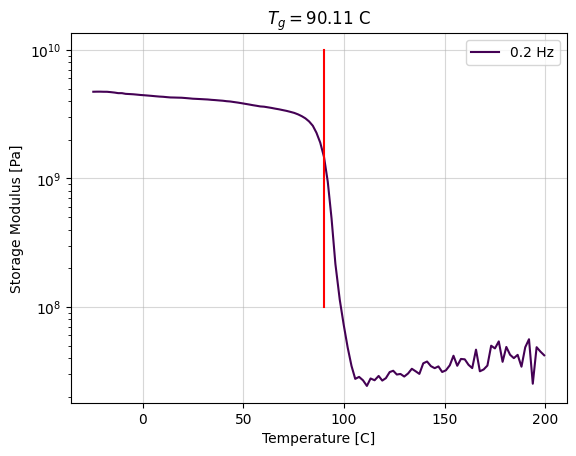

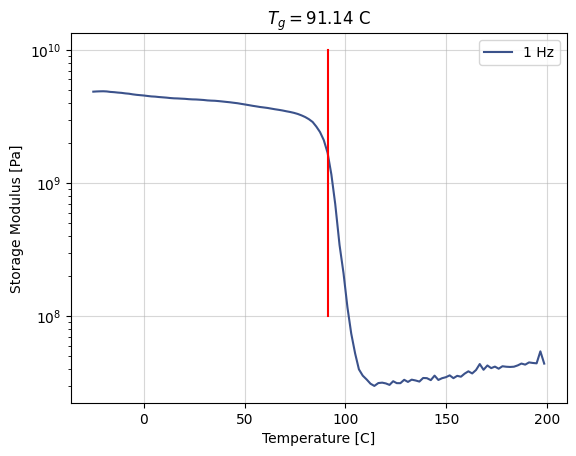

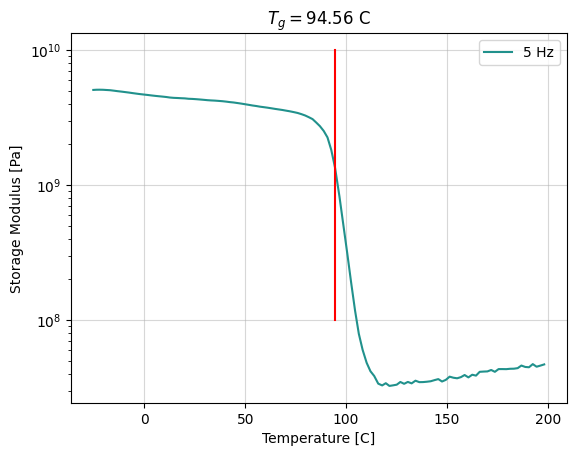

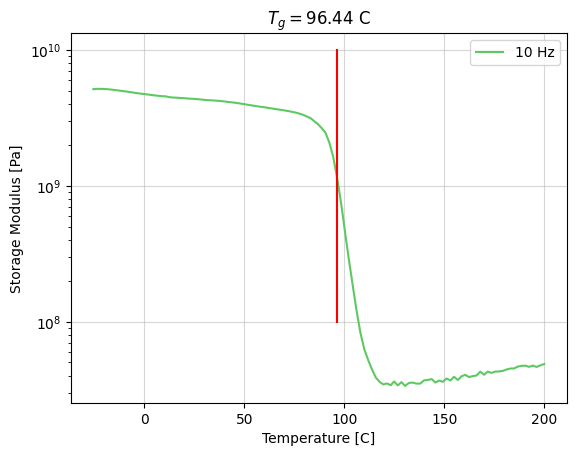

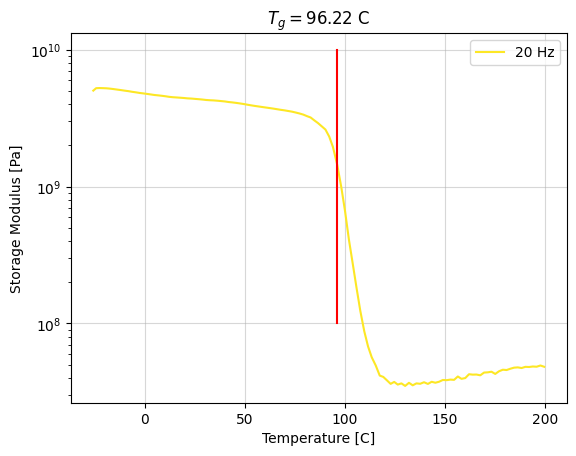

In [148]:
DMA = pd.read_excel("DMA results - new.xlsx", header=29)
DMA = DMA.drop(index=0)
DMA = DMA.drop(index=[DMA.index[i] for i in range(-1,-43,-1)])
DMA.head()
freq_list = [0.200000002980232, 1, 5, 10, 20]
for i, freq in enumerate(freq_list):
    plt.grid(alpha=0.5)

    DMA_freq = DMA.loc[(DMA['Freq.'] == freq)&(DMA['Temp.']<200)]
    plt.semilogy(DMA_freq["Temp."], DMA_freq["E\'(G\')"], color=colors[i], label=f'{round(freq,1)} Hz')


    dE_dT = [DMA_freq["E\'(G\')"].to_numpy()[i+1]-DMA_freq["E\'(G\')"].to_numpy()[i]/(DMA_freq["Temp."].to_numpy()[i+1]-DMA_freq["Temp."].to_numpy()[i])  for i in range(len(DMA_freq["Temp."].to_numpy())-1)]
    dE_dT_dT = [dE_dT[i+1]-dE_dT[i]/(DMA_freq["Temp."].to_numpy()[i+1]-DMA_freq["Temp."].to_numpy()[i])  for i in range(len(DMA_freq["Temp."].to_numpy())-2)]
    # plt.plot(DMA_freq["Temp."].to_numpy()[:-2],dE_dT_dT)
    index_min = np.array(dE_dT_dT).argmin(axis=0)
    plt.title(f"$T_g = {round(DMA_freq["Temp."].to_numpy()[index_min],2)}$ C")
    plt.plot([DMA_freq["Temp."].to_numpy()[index_min], DMA_freq["Temp."].to_numpy()[index_min]], [1e10, 1e8], color="red")
    plt.legend()
    plt.ylabel("Storage Modulus [Pa]")
    plt.xlabel("Temperature [C]")
    plt.show()

### Question 6 (3 points)

#### Other methods of finding $T_g$ also exist. One of these methods works by taking the peak of the loss modulus $G''$. The corresponding temperature is then said to be $T_g$. Another method works the same as the previously mentioned method, but uses the $tan(\delta)$ function.

#### Question 6.1: Chose 1 of the above described methods (i.e either peak of the loss modulus or peak of tan(delta)). Report the method and associated $T_g$ values for all five datasets.

In [149]:
DMA = pd.read_excel("DMA results - new.xlsx", header=29)
DMA = DMA.drop(index=0)
DMA = DMA.drop(index=[DMA.index[i] for i in range(-1,-43,-1)])
DMA.head()
freq_list = [0.200000002980232, 1, 5, 10, 20]
print("Peak of loss modulus")
for i, freq in enumerate(freq_list):
    DMA_freq = DMA.loc[(DMA['Freq.'] == freq)&(DMA['Temp.']<200)]
    print(f"Tg at {round(freq, 2)} = "+str(round(DMA_freq["Temp."][DMA_freq["E\"(G\")"]==DMA_freq["E\"(G\")"].max()].iloc[0],2))+" C")

Peak of loss modulus
Tg at 0.2 = 90.11 C
Tg at 1 = 93.02 C
Tg at 5 = 94.56 C
Tg at 10 = 94.32 C
Tg at 20 = 96.22 C


In [150]:
DMA = pd.read_excel("DMA results - new.xlsx", header=29)
DMA = DMA.drop(index=0)
DMA = DMA.drop(index=[DMA.index[i] for i in range(-1,-43,-1)])
DMA.head()
freq_list = [0.200000002980232, 1, 5, 10, 20]
print("Peak of tan delta")
for i, freq in enumerate(freq_list):
    DMA_freq = DMA.loc[(DMA['Freq.'] == freq)&(DMA['Temp.']<200)]
    print(f"Tg at {round(freq, 2)} = {round(DMA_freq["Temp."][(DMA_freq["E\"(G\")"] / DMA_freq["E\'(G\')"]) == (
                DMA_freq["E\"(G\")"] / DMA_freq["E\'(G\')"]).max()].iloc[0], 2)} C")

Peak of tan delta
Tg at 0.2 = 97.92 C
Tg at 1 = 101.0 C
Tg at 5 = 104.45 C
Tg at 10 = 106.06 C
Tg at 20 = 107.75 C


#### Question 6.2: Summarise your findings of Question 5 and Question 6.1 in a single graph with the different test frequencies on the x-axis and calculated Tg values on the y-axis. Comment on the effect of the test frequency on the glass transition temperature. Finally, explain why this happens and why it would be important to take the test frequency into account when designing structures.
#### NOTE: the output should be a single graph, showing four temperature values corresponding to the four methods, with the tested frequencies reported on the x-axis

"\nIt is clear that the higher the frequency of the test the higher the calculated Tg. This is due to polymers being visco-elastic and the mechanical response is strain rate dependent, they become stiffer with increasing strain rate.\nThe loads on the structure could have a high frequency or strain rate which would make the higher Tg applicable so it is important to use the Tg relevant to your load's strain rate or to use this effect in your model and therefore model your object visco-elastically.\nIn materials that must deform such as seals or tires this effect can make the previously soft material very hard and fail.\n"

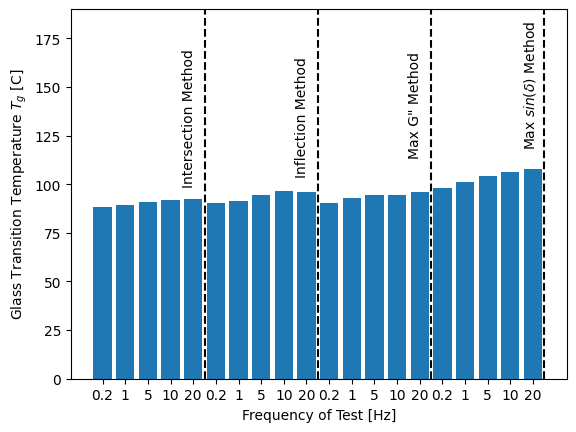

In [151]:
# Code for plot here
Tg = [88.43, 89.37, 91.06, 91.80, 92.60,
      90.11, 91.14, 94.56, 96.44, 96.22,
      90.11, 93.02, 94.56, 94.32, 96.22,
      97.92, 101.0, 104.45, 106.06, 107.75]
Freqs = [0.2, 1, 5, 10, 20]*4

plt.annotate("Intersection Method",[3.5, 100], rotation=90)
plt.annotate("Inflection Method",[8.5, 105], rotation=90)
plt.annotate("Max G\" Method",[13.5, 115], rotation=90)
plt.annotate(r"Max $sin(\delta)$ Method",[18.5, 120], rotation=90)

plt.ylim(0, 190)
plt.bar(np.arange(len(Tg)), Tg)
plt.xticks(np.arange(len(Tg)), Freqs)
plt.ylabel("Glass Transition Temperature $T_g$ [C]")
plt.xlabel("Frequency of Test [Hz]")
plt.plot([4.5, 4.5], [0, 190], color="black", linestyle="dashed")
plt.plot([9.5, 9.5], [0, 190], color="black", linestyle="dashed")
plt.plot([14.5, 14.5], [0, 190], color="black", linestyle="dashed")
plt.plot([19.5, 19.5], [0, 190], color="black", linestyle="dashed")

# Comment
"""
It is clear that the higher the frequency of the test the higher the calculated Tg. This is due to polymers being visco-elastic and the mechanical response is strain rate dependent, they become stiffer with increasing strain rate.
The loads on the structure could have a high frequency or strain rate which would make the higher Tg applicable so it is important to use the Tg relevant to your load's strain rate or to use this effect in your model and therefore model your object visco-elastically.
In materials that must deform such as seals or tires this effect can make the previously soft material very hard and fail.
"""

### Question 7 (5 points)

#### Now that several important aspects of viscosity of reacting polymers have been discussed, we will take a look at how this material property and other material and process parameters play a role in polymer flow. . In this case we will consider RTM. This will be done with the help of Darcy's law. The most widely used equation for describing flow through RTM molds is Darcy’s equation for flow through porous media, displayed in the equation below.
$$ Q = \frac{K_{ij}A}{\eta \Delta L} \Delta P $$

#### For which $K_{ij}$ is the permeability tensor of the preform and $\Delta L$ is the distance travelled by the resin. An average value of $K$ can be found from the Kozeny-Carman equations for resin flow in a unidirectional fibre network. For further information, please visit Chapter 4.4 ''Resin Flow'' from Processing of Polymer Matrix Composites by P.K. Mallick.


#### Question 7.1: Consider the panel in the picture below. The panel consists of a preform and still needs to be injected with epoxy resin. The fibres are T700 carbon fibres, the fibre volume content can be set to 40% (already at time of injection). The lay-up is [20%@90° / 30%@+-45° / 50%@0°] symmetric and balanced, with the 0 degree direction aligned in the length direction of the panel. The injection and mould temperatures are 120°C. The gelation time of the resin is set to 90 minutes. The viscosity of the resin can be assumed to linearly increase from 0.03 to 0.045 Pa.s over the course of 90minutes, at a temperature of 120°C.

![title](flow_fig.png)

#### It is required to perform injection at a constant flow rate. To achieve this, please determine the required pressure gradient [Bar] over time [min] and report your results in a graph. Additionally, report the undertaken steps to find a proper value of $K$ (provide sources as well).

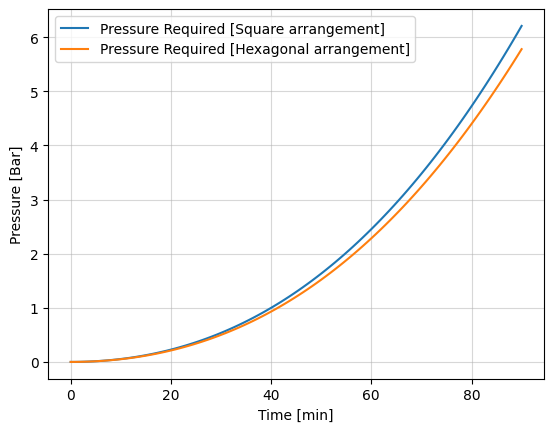

In [152]:
# T700 gives fibre diameter
# Using Toray's T700 fibre for reference
# Source: https://www.toraycma.com/wp-content/uploads/T700G-Technical-Data-Sheet-1.pdf
df = 7e-6
# Since we are not sure of the arrangement we will see what is the worst case scenario
for arrangment in ["Square", "Hexagonal"]:
    if arrangment == "Square":
        # Square arrangement
        C1, C2, vfmax = 57, 0.4, 0.785
    elif arrangment == "Hexagonal":
        # Hexagonal arrangement
        C1, C2, vfmax = 53, 0.231, 0.906
    else:
        pass

    vf = 0.4
    # Equations used from the book Processing of Polymer Composite Manufacturing
    K11 = (2*df**2/C1)*((1-vf**3)/vf**2)
    K22 = C2*((vfmax/vf)**0.5-1)**(5/2)*(df**2/4)

    # Since it is infused from the left side we only care when it reaches the right side ie fully infused
    # Infusion time = Gelation time is the minimum required pressure
    # x is infusion direction
    theta90 = np.deg2rad(90)
    theta45 = np.deg2rad(45)
    theta0 = np.deg2rad(0)
    Kxx90 = K11*np.cos(theta90)**2 + K22*np.sin(theta90)**2
    Kxx45 = K11*np.cos(theta45)**2 + K22*np.sin(theta45)**2
    Kxx0 = K11*np.cos(theta0)**2 + K22*np.sin(theta0)**2
    KxxAvg = 0.2*Kxx90+0.3*Kxx45+0.5*Kxx0
    # Kyy = K11*np.sin(theta)**2 + K22*np.cos(theta)**2
    # Q = (dL/dt)*A
    # Q = ((K*A)/(eta*L)) dP
    # LdL/dt = (K/eta) dP
    # integrate with dt
    # 1/2 L^2 = K/(eta)dP T

    # Since the saturated condition gives the highest required pressure it will be used
    t = np.linspace(0, 90*60, 100)
    L = (t)/(90*60)
    eta = 0.03 + 0.015*(t/(90*60))
    dt = 90*60/100
    T = 90*60
    P = (eta*L**2)/(2*KxxAvg*T)
    plt.plot(t/60, P*1e-5, label=f"Pressure Required [{arrangment} arrangement]")
    plt.ylabel("Pressure [Bar]")
    plt.xlabel("Time [min]")
    plt.legend()
plt.grid(alpha=0.5)
plt.show()


# the square arrangment is the worst case scenario so that will be chosen in our calculations to be conservative

Answer:
The K value is calculated for the layers using the equations from the book Processing of Polymer Composites and then the transformations are applied according to their angle. Then a weighted average is taken according to their ratio in the layup to find the approximate K. Since the arrangement of the fibres is not known, both options are plotted to allow us to take the worst case scenario for the sizing of our system.



#### Question 7.2: First, comment on the required pressure gradients you obtained in the previous question.
#### Now, consider another infusion of the same preform. The gelation time of the resin is set to 90 minutes at 120°C.
#### If you were to optimize the manufacturing parameters for this technique, what specific modifications or improvements would you propose? Consider infusion direction, number of resin inlets, any possible steps in the process and which pressure should be applied. Propose two possible approaches and compare them.
#### Finally, compare your optimized strategies with the results obtained in question 7.1 by visualizing plots for the required pressure gradient [Bar] over time [min]. Provide your reflection about the outcomes in the cells below.

#### NOTE: If your optimized manufacturing process includes changes in infusion direction, make sure to consider proper assumptions and values for the calculated permeability of the preform.

Reflection:
The pressure required increases quadratically with the infusion time and far exceeds regular infusion pressures of around 1 bar for vacuum assisted resin infusion. The pressure reaches 6 bars so a pressurized resin infusion method will be needed for this panel & infusion strategy.

Optimization strategy:
One approach would be to infuse the panel from the top side, this would increase the length the resin can infuse the panel from and decrease the length of panel that it would travel.

Another approach would be to infuse it from the center of the panel along the length direction outwards in the vertical direction. You would need 2 pumps to apply the vacuum as there would be to outlets but this would provide the fastest solution without needing to insert resin from additional points.



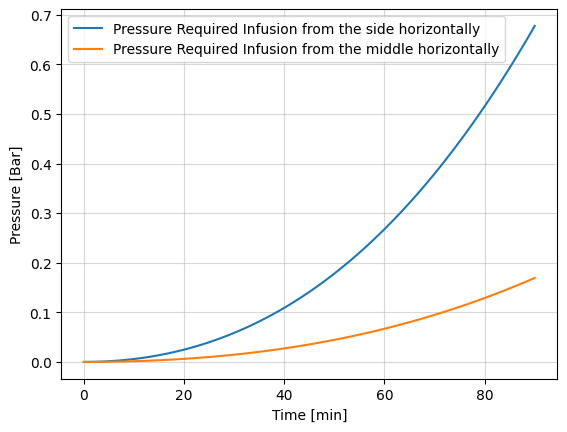

In [153]:
df = 7e-6
# Since the square arrangment is the worst case scenario that will be used for this question.
# Square arrangement
C1, C2, vfmax = 57, 0.4, 0.785

vf = 0.4

K11 = (2*df**2/C1)*((1-vf**3)/vf**2)
K22 = C2*((vfmax/vf)**0.5-1)**(5/2)*(df**2/4)

# Since it is infused from the left side we only care when it reaches the right side ie fully infused
# Infusion time = Gelation time is the minimum required pressure
# x is infusion direction
theta90 = np.deg2rad(90)
theta45 = np.deg2rad(45)
theta0 = np.deg2rad(0)
Kxx90 = K11*np.cos(theta90)**2 + K22*np.sin(theta90)**2
Kxx45 = K11*np.cos(theta45)**2 + K22*np.sin(theta45)**2
Kxx0 = K11*np.cos(theta0)**2 + K22*np.sin(theta0)**2
KxxAvg = 0.5*Kxx90+0.3*Kxx45+0.2*Kxx0 # 0 and 90 is switched to account for the infusion direction
KxxAvgOriginal = 0.2*Kxx90+0.3*Kxx45+0.5*Kxx0
# Kyy = K11*np.sin(theta)**2 + K22*np.cos(theta)**2
# Q = (dL/dt)*A
# Q = ((K*A)/(eta*L)) dP
# LdL/dt = (K/eta) dP
# integrate with dt
# 1/2 L^2 = K/(eta)dP T

# Since the saturated condition gives the highest required pressure it will be used
# t = np.linspace(0, 90*60, 100)
# L = (t)/(90*60)
# eta = 0.03 + 0.015*(t/(90*60))
# dt = 90*60/100
# T = 90*60
# P = (eta*L**2)/(2*KxxAvg*T)
# plt.plot(t/60, P*1e-5, label=f"Pressure Required Original Infusion")

t = np.linspace(0, 90*60, 100)
L = 0.25*(t)/(90*60)
eta = 0.03 + 0.015*(t/(90*60))
dt = 90*60/100
T = 90*60
P = (eta*L**2)/(2*KxxAvg*T)
plt.plot(t/60, P*1e-5, label=f"Pressure Required Infusion from the side horizontally")

t = np.linspace(0, 90*60, 100)
L = ((0.25)/2)*(t)/(90*60)
eta = 0.03 + 0.015*(t/(90*60))
dt = 90*60/100
T = 90*60
P = (eta*L**2)/(2*KxxAvg*T)
plt.plot(t/60, P*1e-5, label=f"Pressure Required Infusion from the middle horizontally")
plt.ylabel("Pressure [Bar]")
plt.xlabel("Time [min]")
plt.legend()
plt.grid(alpha=0.5)
plt.show()


Reflection:
The infusion strategies selected both reduce the maximum infusion pressure, the first reduces it 11 times and the second reduces it by 44 times compared to the original infusion strategy. The side infusion is possible with the same hardware as the original infusion strategy while the second option may need additional inlets for the vacuum pump, but it is clearly the best infusion strategy.

### Question 8 (6 points)

#### As you know, fibre volume content $V_f$ plays an important role in the permeability of a preform and therefore influences the required injection pressure. Now, assume a constant viscosity of 0.03 Pa.s and a distance of 1 meter for the resin to flow. Determine the required pressure to inject over this distance in 40 minutes, for different fibre volume fractions from 0.35 to 0.65 with steps of 0.05. Note: the laminate is the same as described in the previous question (Q7). 

#### Question 8.1: Create a graph showing K (on a logarithmic scale) vs. $V_f$ (x-axis) 
#### - A mould was manufactured using tolerances of $2\pm0.3mm$ as shown in the figure below. Show in the same plot the change in the value of K for the 3 regions in the mould (A, B & C).
#### - Assume: $\rho_f=1.8g/cm^3$, Areal Weight of Fibre = 400GSM with the laminate having 5 layers
#### Hint: $V_f$ = $f\{AW, n, \rho_f, t\}$

![title](Q8.jpg)

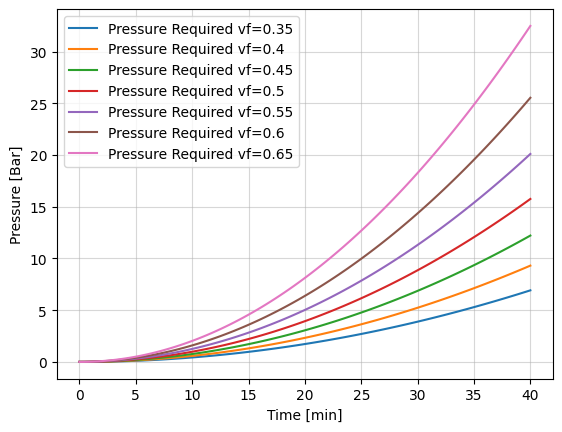

In [154]:
# Code for 1st plot here
df = 7e-6
# Since we are not sure of the arrangement we will see what is the worst case scenario
for vf in np.arange(0.35, 0.65, 0.05):
    # Square arrangement
    C1, C2, vfmax = 57, 0.4, 0.785

    K11 = (2*df**2/C1)*((1-vf**3)/vf**2)
    K22 = C2*((vfmax/vf)**0.5-1)**(5/2)*(df**2/4)

    # Since it is infused from the left side we only care when it reaches the right side ie fully infused
    # Infusion time = Gelation time is the minimum required pressure
    # x is infusion direction
    theta90 = np.deg2rad(90)
    theta45 = np.deg2rad(45)
    theta0 = np.deg2rad(0)
    Kxx90 = K11*np.cos(theta90)**2 + K22*np.sin(theta90)**2
    Kxx45 = K11*np.cos(theta45)**2 + K22*np.sin(theta45)**2
    Kxx0 = K11*np.cos(theta0)**2 + K22*np.sin(theta0)**2
    KxxAvg = 0.2*Kxx90+0.3*Kxx45+0.5*Kxx0
    # Kyy = K11*np.sin(theta)**2 + K22*np.cos(theta)**2
    # Q = (dL/dt)*A
    # Q = ((K*A)/(eta*L)) dP
    # LdL/dt = (K/eta) dP
    # integrate with dt
    # 1/2 L^2 = K/(eta)dP T

    # Since the saturated condition gives the highest required pressure it will be used
    T = 40*60 # Infusion time [s]
    t = np.linspace(0, T, 100)
    L = (t)/(T)
    eta = 0.03*np.ones_like(t)
    dt = T/100
    P = (eta*L**2)/(2*KxxAvg*T)
    plt.plot(t/60, P*1e-5, label=f"Pressure Required vf={round(vf,2)}")
    plt.ylabel("Pressure [Bar]")
    plt.xlabel("Time [min]")
    plt.legend()
plt.grid(alpha=0.5)
plt.show()



#### Question 8.2: Next, report your results by plotting the required $\Delta P$ for infusion per fibre volume fraction $V_f$ .
#### - Show the change in $\Delta P$ for all regions in the same plot.

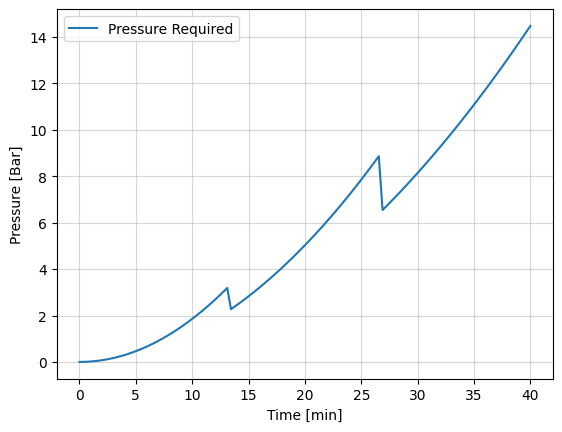

In [155]:
# Code for 2nd plot here

cmtom = 1e-2

AW = 400 # [g/m^2]
n = 5 # Layers [-]
rhof = 1.8/(cmtom**3) # Fibre density [g/m^3]
AWtot = AW*n
t = [1.76, 2.02, 2.3] # Thicknesses of the mold gap [mm]
tarr = np.hstack((t[0]*np.ones((40)), t[1]*np.ones((40)), t[2]*np.ones((40))))*1e-3

rhotot = AWtot/(tarr)
vf = rhotot/rhof
# Square arrangement
C1, C2, vfmax = 57, 0.4, 0.785

K11 = (2*df**2/C1)*((1-vf**3)/vf**2)
K22 = C2*((vfmax/vf)**0.5-1)**(5/2)*(df**2/4)

# Since it is infused from the left side we only care when it reaches the right side ie fully infused
# Infusion time = Gelation time is the minimum required pressure
# x is infusion direction
theta90 = np.deg2rad(90)
theta45 = np.deg2rad(45)
theta0 = np.deg2rad(0)
Kxx90 = K11*np.cos(theta90)**2 + K22*np.sin(theta90)**2
Kxx45 = K11*np.cos(theta45)**2 + K22*np.sin(theta45)**2
Kxx0 = K11*np.cos(theta0)**2 + K22*np.sin(theta0)**2
KxxAvg = 0.2*Kxx90+0.3*Kxx45+0.5*Kxx0
# Kyy = K11*np.sin(theta)**2 + K22*np.cos(theta)**2
# Q = (dL/dt)*A
# Q = ((K*A)/(eta*L)) dP
# LdL/dt = (K/eta) dP
# integrate with dt
# 1/2 L^2 = K/(eta)dP T

# Since the saturated condition gives the highest required pressure it will be used
T = 40*60 # Infusion time [s]
t = np.linspace(0, T, 120)
L = (t)/(T)
eta = 0.03*np.ones_like(t)
dt = T/120
P = (eta*L**2)/(2*KxxAvg*T)
plt.plot(t/60, P*1e-5, label=f"Pressure Required")
plt.ylabel("Pressure [Bar]")
plt.xlabel("Time [min]")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

#### Question 8.3: Finally, comment on your results and critically analyse the obtained values. Explain the effect the changed K and $\Delta P$ could have on other factors such as infusion time and the final quality of the product. Comment on the tolerances used.

Comment:
The thinning of the part would drastically decrease the out of plane bending stiffness of the product. The sharp changes would leave resin rich areas where the fibres begin to steer past the step in the mold. The sharp increases of fibre volume fraction could cause stress concentrations locally as the layers must deform. In reality the resin will not step in pressure in such a sharp way as it will flow past the step and not flow into it and spike the pressure.

Tolerances are too broad for this application as the thickness can vary by 30%. I would also expect this data to relate to a taper in the mold rather than steps in it as this is more likely defect in machining and related mold production techniques. Rather the data is 3 points at which the mold were inspected and incorrectly interpolated.